In [1]:
import os
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
import seaborn as sns

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

if not os.path.exists('figures'): 
    os.mkdir('figures')

## Ocean and Dielectric Modules

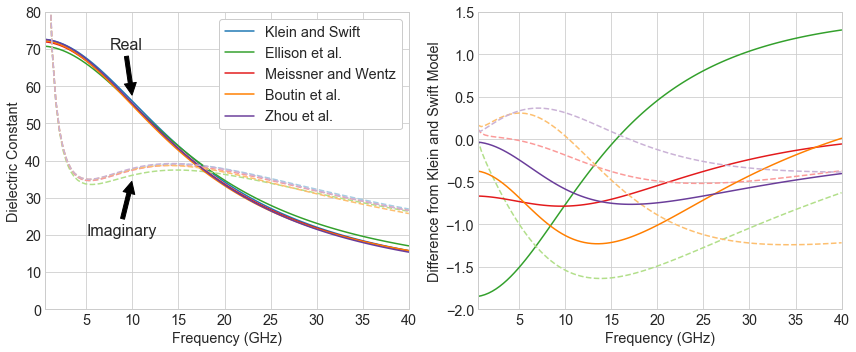

In [2]:
from foam import dielectric 

palette = sns.color_palette('Paired')
freq = np.linspace(0.5e3, 40e3, 100)
ghz = freq / 1e3
sss = np.array([34])
sst = np.array([273.15 + 20])

ks = dielectric.h2o_liquid_KleinSwift(freq, sst, sss)
el = dielectric.h2o_liquid_Ellison(freq, sst, sss)
mw = dielectric.h2o_liquid_MeissnerWentz(freq, sst, sss)
bo = dielectric.h2o_liquid_Boutin(freq, sst, sss)
zh = dielectric.h2o_liquid_Zhou(freq, sst, sss)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(ghz, np.real(ks), label='Klein and Swift', color=palette[1])
axs[0].plot(ghz, abs(np.imag(ks)), color=palette[0], linestyle='--')
axs[0].plot(ghz, np.real(el), label='Ellison et al.', color=palette[3])
axs[0].plot(ghz, abs(np.imag(el)), color=palette[2], linestyle='--')
axs[0].plot(ghz, np.real(mw), label='Meissner and Wentz', color=palette[5])
axs[0].plot(ghz, abs(np.imag(mw)), color=palette[4], linestyle='--')
axs[0].plot(ghz, np.real(bo), label='Boutin et al.', color=palette[7])
axs[0].plot(ghz, abs(np.imag(bo)), color=palette[6], linestyle='--')
axs[0].plot(ghz, np.real(zh), label='Zhou et al.', color=palette[9])
axs[0].plot(ghz, abs(np.imag(zh)), color=palette[8], linestyle='--')

axs[1].plot(ghz, np.real(el) - np.real(ks), label='Ellison et al.', color=palette[3])
axs[1].plot(ghz, abs(np.imag(el)) - abs(np.imag(ks)), color=palette[2], linestyle='--')
axs[1].plot(ghz, np.real(mw) - np.real(ks), label='Meissner and Wentz', color=palette[5])
axs[1].plot(ghz, abs(np.imag(mw)) - abs(np.imag(ks)), color=palette[4], linestyle='--')
axs[1].plot(ghz, np.real(bo) - np.real(ks), label='Boutin et al.', color=palette[7])
axs[1].plot(ghz, abs(np.imag(bo)) - abs(np.imag(ks)), color=palette[6], linestyle='--')
axs[1].plot(ghz, np.real(zh) - np.real(ks), label='Zhou et al.', color=palette[9])
axs[1].plot(ghz, abs(np.imag(zh)) - abs(np.imag(ks)), color=palette[8], linestyle='--')

axs[0].set_xlabel('Frequency (GHz)')
axs[0].set_ylabel('Dielectric Constant')
axs[0].set_xlim(0.5, 40)
axs[0].set_ylim(0, 80)
leg = axs[0].legend(frameon=True, framealpha=1)
axs[0].annotate('Real', (10, 57), (7.5, 70), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)
axs[0].annotate('Imaginary', (10, 35), (5, 20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)

axs[1].set_xlabel('Frequency (GHz)')
axs[1].set_ylabel('Difference from Klein and Swift Model')
axs[1].set_xlim(0.5, 40)
axs[1].set_ylim(-2, 1.5)
plt.tight_layout()
plt.savefig(os.path.join('figures', 'dielectric_compare.png'), dpi=300)


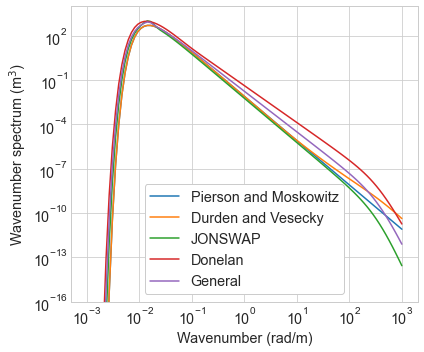

In [3]:
from foam import ocean 

ts = ocean.two_scale()
wind = np.array([20])
k = np.logspace(-3, 3, 100)
ustar = ts.speed_10m_to_friction(wind, method='yueh')
u19 = ts.friction_to_speed(ustar, 19.5)
kc = 9.81 / u19**2
ints = np.sqrt(2 / 3 * 0.74 * kc**2)

pm = ts.spectrum_PM(k, wind)

dv = ts.spectrum_DV(k, wind)
js = ts.spectrum_jonswap(k, wind)
dn = ts.spectrum_donelan(k, wind)
gn = ts.spectrum_general(k, wind, s_g=4.5)

plt.figure(figsize=(6, 5))
plt.loglog(k, pm, label='Pierson and Moskowitz')
plt.loglog(k, dv, label='Durden and Vesecky')
plt.loglog(k, js, label='JONSWAP')
plt.loglog(k, dn, label='Donelan')
plt.loglog(k, gn, label='General')

plt.legend(frameon=True, framealpha=1, loc=8)
plt.ylim(1e-16, 1e4)
plt.xlabel('Wavenumber (rad/m)')
plt.ylabel('Wavenumber spectrum (m$^3$)')
plt.tight_layout()
plt.savefig(os.path.join('figures', 'wavenumber_spectra.png'), dpi=300)


/Users/akins/Documents/Codes/FOAM/foam/ocean.py:1080: RuntimeWarning: divide by zero encountered in true_divide
  kdph = arctan(kdy / kdx)
/Users/akins/Documents/Codes/FOAM/foam/ocean.py:1192: RuntimeWarning: divide by zero encountered in true_divide
  kdph = arctan(kdy / kdx)


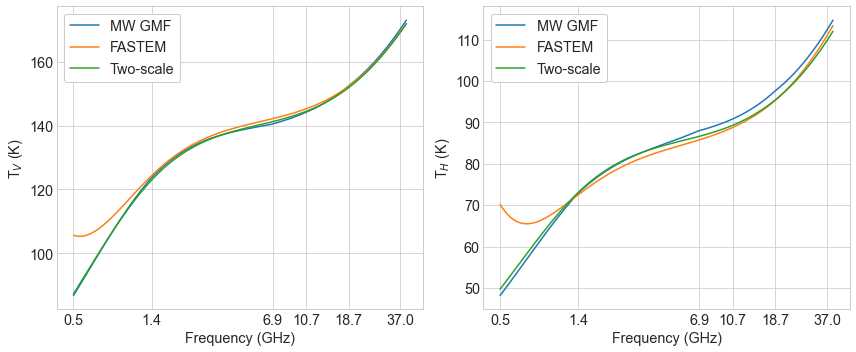

In [18]:
from foam import ocean 

frequency = np.logspace(np.log10(500), np.log10(40e3), 100)
ghz = frequency / 1e3
sss = np.array([34])
sst = np.array([273.15 + 20])
uwind = np.array([10])
vwind = np.array([0])
theta = np.array([45])
phi = np.array([0])

# Meissner Wentz empirical GMF 
o = ocean.ocean(mode='full')
emis = o.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_mw = emis * sst 

# FASTEM model 
o2 = ocean.fastem()
emis = o2.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_fastem = emis * sst

# Two-scale model 
o3 = ocean.two_scale()
emis = o3.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_twoscale = emis * sst

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(ghz, ot_mw[0, :], label='MW GMF')
plt.plot(ghz, ot_fastem[0, :], label='FASTEM')
plt.plot(ghz, ot_twoscale[0, :], label='Two-scale')
plt.xlabel('Frequency (GHz)')
plt.ylabel('T$_V$ (K)')
plt.legend(frameon=True, framealpha=1)
plt.xscale('log')
ax = plt.gca()
ax.set_xticks([0.5, 1.4, 6.9, 10.7, 18.7, 37])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.subplot(122)
plt.plot(ghz, ot_mw[1, :], label='MW GMF')
plt.plot(ghz, ot_fastem[1, :], label='FASTEM')
plt.plot(ghz, ot_twoscale[1, :], label='Two-scale')
plt.xlabel('Frequency (GHz)')
plt.ylabel('T$_H$ (K)')
plt.legend(frameon=True, framealpha=1)
plt.xscale('log')
ax = plt.gca()
ax.set_xticks([0.5, 1.4, 6.9, 10.7, 18.7, 37])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tight_layout()
plt.savefig(os.path.join('figures', 'model_tb_spectra.png'), dpi=300, transparent=True)


In [2]:
from foam import ocean 

frequency = np.array([1.4e3])
ghz = frequency / 1e3
sss = np.array([34])
sst = np.array([273.15 + 20])
uwind = np.array([10])
vwind = np.array([0])
theta = np.linspace(0, 60, 50)
phi = np.array([0])

# Meissner Wentz empirical GMF 
o = ocean.ocean(mode='full')
emis = o.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_mw = emis * sst

# FASTEM model 
o2 = ocean.fastem()
emis = o2.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_fastem = emis * sst

# Two-scale model 
o3 = ocean.two_scale()
emis = o3.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_twoscale = emis * sst

palette = sns.color_palette('Paired')

plt.figure(figsize=(7,6))
plt.plot(theta, ot_mw[0, :], label='MW GMF (V-pol)', color='tab:blue')
plt.plot(theta, ot_mw[1, :], label='MW GMF (H-pol)', color='tab:blue', linestyle='--')
plt.plot(theta, ot_fastem[0, :], label='FASTEM (V-pol)', color='tab:orange')
plt.plot(theta, ot_fastem[1, :], label='FASTEM (H-pol)', color='tab:orange', linestyle='--')
plt.plot(theta, ot_twoscale[0, :], label='Two-scale (V-pol)', color='tab:green')
plt.plot(theta, ot_twoscale[1, :], label='Two-scale (H-pol)', color='tab:green', linestyle='--')
plt.xlabel('Incidence angle (deg.)')
plt.ylabel('T$_p$ (K)')
plt.legend(frameon=True, framealpha=1)

plt.tight_layout()
plt.savefig(os.path.join('figures', 'inc_angle_dep.png'), dpi=300, transparent=True)

ValueError: Specify mode as either "flat" or "rough"

Elapsed: 903.306760793


<Figure size 504x432 with 0 Axes>

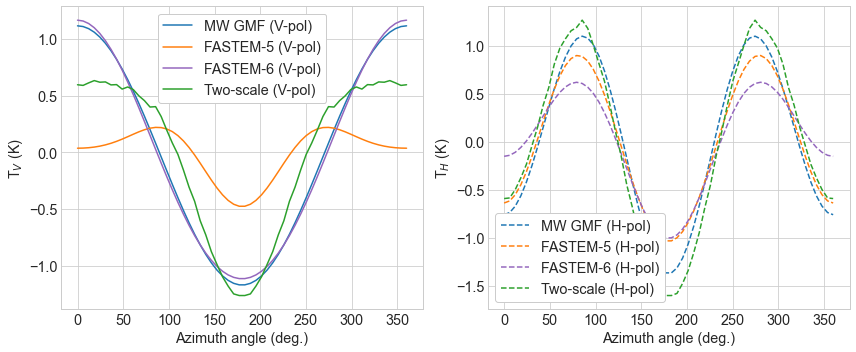

In [2]:
from foam import ocean 
import time 

frequency = np.array([19.e3])
ghz = frequency / 1e3
phi = np.linspace(0, 360, 60)
sss = np.array([34])
sst = np.array([273.15 + 13])
uwind = np.array([10])
vwind = np.array([0])
theta = np.array([55])

# Meissner Wentz empirical GMF 
o = ocean.ocean(mode='rough')
emis = o.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_mw = emis * sst

# FASTEM model - v5
o2 = ocean.fastem(version='5')
emis = o2.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_fastem = emis * sst

# FASTEM v6
o2p1 = ocean.fastem(version='6')
emis = o2p1.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
ot_fastem6 = emis * sst

# Two-scale model 
# Warning: this one takes awhile! 
o3 = ocean.two_scale()
t = time.perf_counter()
emis = o3.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi, parallel=True, nproc=4, cutoff_factor=3)
print('Elapsed: {}'.format(time.perf_counter() - 1))
ot_twoscale = emis * sst

palette = sns.color_palette('Paired')

plt.figure(figsize=(7,6))
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(phi, ot_mw[0, :] - np.mean(ot_mw[0, :]), label='MW GMF', color='tab:blue')
axs[1].plot(phi, ot_mw[1, :] - np.mean(ot_mw[1, :]), label='MW GMF', color='tab:blue', linestyle='--')
axs[0].plot(phi, ot_fastem[0, :] - np.mean(ot_fastem[0, :]), label='FASTEM-5', color='tab:orange')
axs[1].plot(phi, ot_fastem[1, :] - np.mean(ot_fastem[1, :]), label='FASTEM-5', color='tab:orange', linestyle='--')
axs[0].plot(phi, ot_fastem6[0, :] - np.mean(ot_fastem6[0, :]), label='FASTEM-6', color='tab:purple')
axs[1].plot(phi, ot_fastem6[1, :] - np.mean(ot_fastem6[1, :]), label='FASTEM-6', color='tab:purple', linestyle='--')

ot_twoscale = np.squeeze(ot_twoscale)

# Two-scale code is a bit rough, smoothing a bit
tscv = ot_twoscale[0, :] - np.mean(ot_twoscale[0, :])
tsch = ot_twoscale[1, :] - np.mean(ot_twoscale[1, :])
kern = 1 / 3 * np.ones(3)
tscv = np.convolve(tscv, kern, mode='same')
tsch = np.convolve(tsch, kern, mode='same')
tscv[0] = tscv[1]
tsch[0] = tsch[1]
tscv[-1] = tscv[-2]
tsch[-1] = tsch[-2]

axs[0].plot(phi, tscv, label='Two-scale', color='tab:green')
axs[1].plot(phi, tsch, label='Two-scale', color='tab:green', linestyle='--')
axs[0].set_xlabel('Azimuth angle (deg.)')
axs[0].set_ylabel('T$_V$ (K)')
axs[1].set_xlabel('Azimuth angle (deg.)')
axs[1].set_ylabel('T$_H$ (K)')
axs[0].legend(frameon=True, framealpha=1)
axs[1].legend(frameon=True, framealpha=1)
# axs[0].set_ylim(-4, 4)
# axs[1].set_ylim(-4, 4)

plt.tight_layout()
plt.savefig(os.path.join('figures', 'azi_angle_dep.png'), dpi=300, transparent=True)

In [2]:
import time
from foam import ocean 

frequency = np.array([19.e3])
ghz = frequency / 1e3
phi = np.linspace(0, 360, 60)
sss = np.array([35])
sst = np.array([273.15 + 13])
uwind = np.array([7])
vwind = np.array([0])
theta = np.array([65])

if __name__ == '__main__':
    ts = time.perf_counter()
    o3 = ocean.two_scale()
    emis = o3.get_ocean_emissivity(frequency, sst, sss, uwind, vwind, theta, phi)
    print('Elapsed: {}'.format(time.perf_counter() - ts))
    ot_twoscale = emis * sst

Elapsed: 136.20750156399998


## Atmosphere Module

/Users/akins/Documents/Codes/FOAM/foam/utils/reader.py:131: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  time = merra['time'][:]


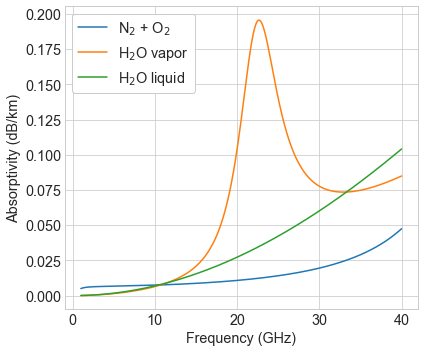

In [34]:
from foam import atmosphere 

atm = atmosphere.atmosphere(mode='simple')
F = np.linspace(1e3, 40e3, 500)
w = 8  # g/m^3
pmb = 950
T = 273.15 + 10  # K
lwc = 100 / 1e6  # kg/m^3

absn2 = atm.n2abs(T, pmb, F) * 4.34
abso2 = atm.o2abs(T, pmb, w, F) * 4.34
absh2o = atm.h2oabs(T, pmb, w, F) * 4.34
abscloud = atm.cloudabs(F, lwc, T) * 4.34 

plt.figure(figsize=(6, 5))
plt.plot(F / 1e3, absn2 + abso2, label='N$_2$ + O$_2$')
plt.plot(F / 1e3, absh2o, label='H$_2$O vapor')
plt.plot(F / 1e3, abscloud, label='H$_2$O liquid')
plt.legend(frameon=True, framealpha=1, loc=2)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Absorptivity (dB/km)')
plt.tight_layout()
plt.savefig(os.path.join('figures', 'atmos_rtm.png'), dpi=300, transparent=True)